In [1]:
import matplotlib.pyplot as plt
import proplot as pplt
from read_experiments import *

In [5]:
print_runs()

runs
├── EXP cartpole_seq16bil2: 10
├── EXP cartpole_seq16bil4: 10
├── EXP cartpole_seq16bil8: 10
├── EXP cartpole_seq2bil2: 10
├── EXP cartpole_seq2bil4: 10
├── EXP cartpole_seq2bil8: 10
├── EXP cartpole_seq4bil2: 10
├── EXP cartpole_seq4bil4: 10
├── EXP cartpole_seq4bil8: 10
├── EXP cartpole_seq8bil2: 10
├── EXP cartpole_seq8bil4: 10
├── EXP cartpole_seq8bil8: 10


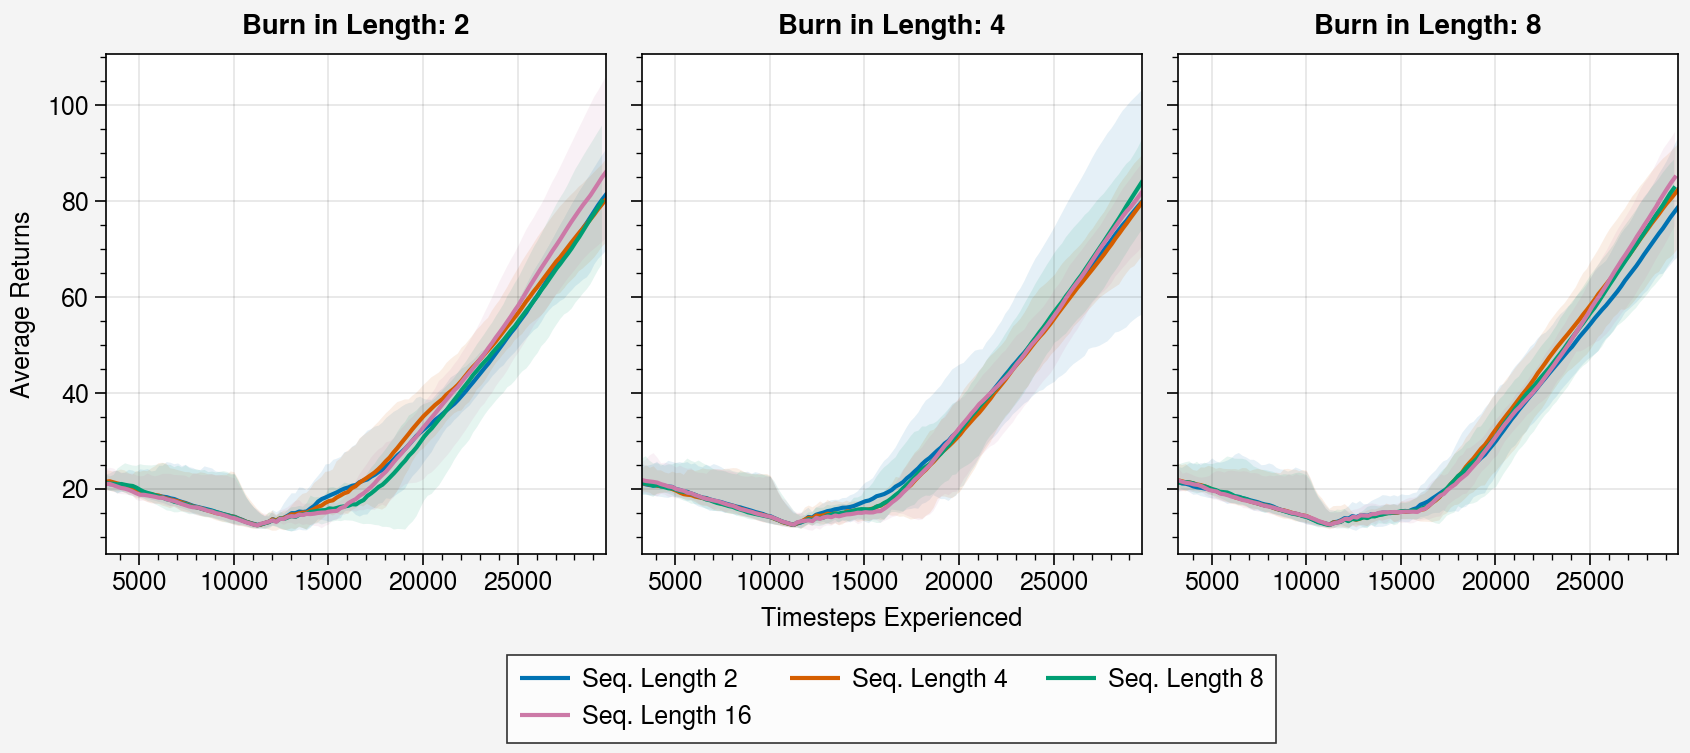

In [15]:
fig, ax = pplt.subplots(ncols=3)

sequence_lengths = [2, 4, 8, 16]
burn_in_lengths = [2, 4, 8]

for i, bil in enumerate(burn_in_lengths):
    lines = []
    for seq in sequence_lengths:
        exp_name = f'cartpole_seq{seq}bil{bil}'
        lines.append(average_runs(exp_name, ax=ax[i], label=f'Seq. Length {seq}'))
        
fig.legend(lines, loc='b')
ax.format(xlabel='Timesteps Experienced', ylabel='Average Returns',
         toplabels=[f'Burn in Length: {bil}' for bil in burn_in_lengths])
fig.savefig('cartpole_performance.jpg')

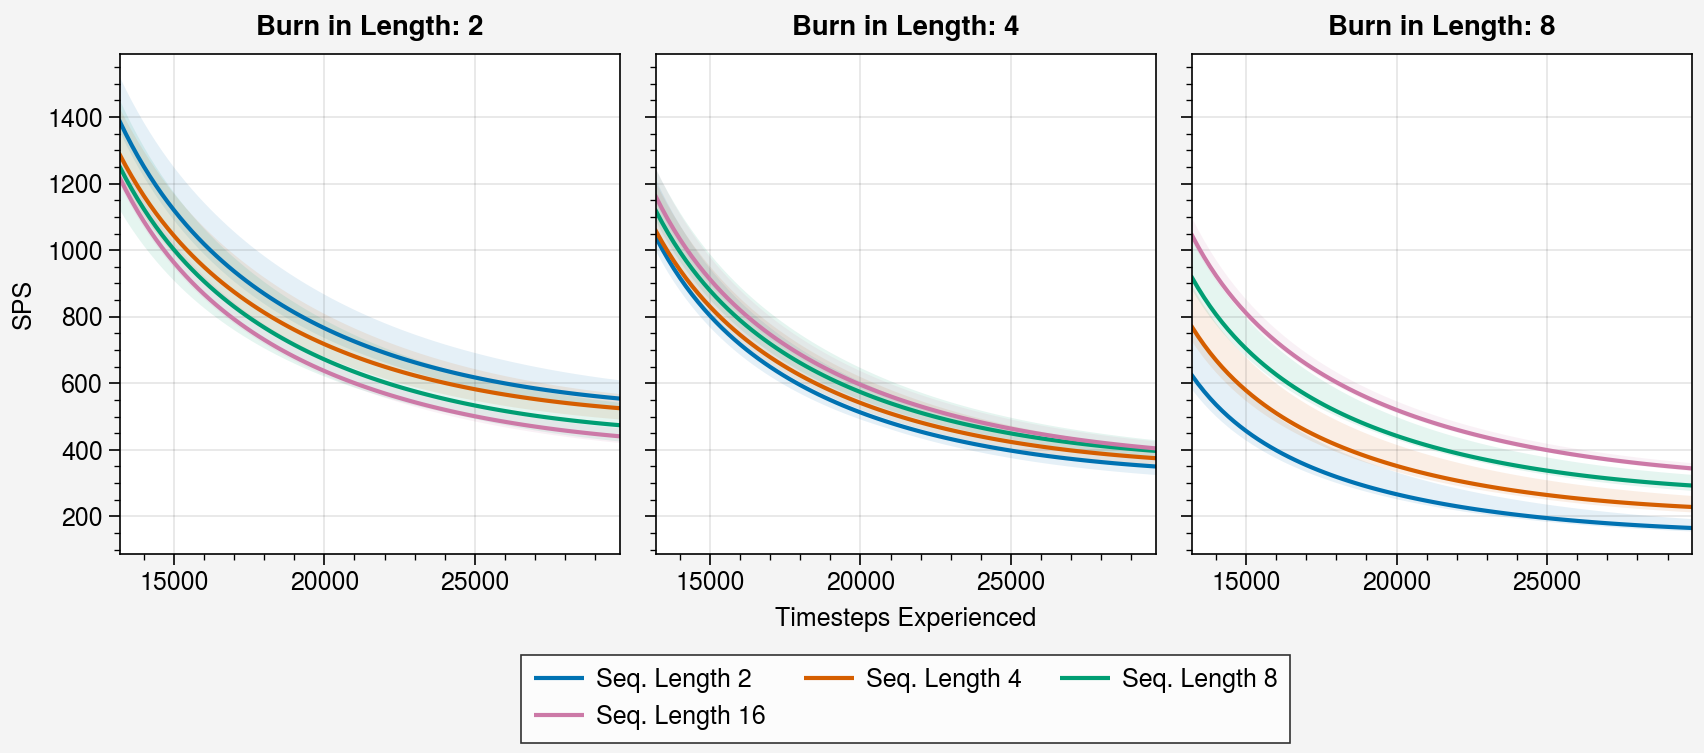

In [16]:
fig, ax = pplt.subplots(ncols=3)

sequence_lengths = [2, 4, 8, 16]
burn_in_lengths = [2, 4, 8]

for i, bil in enumerate(burn_in_lengths):
    lines = []
    for seq in sequence_lengths:
        exp_name = f'cartpole_seq{seq}bil{bil}'
        lines.append(average_runs(exp_name, metric='charts/SPS', ax=ax[i], label=f'Seq. Length {seq}'))
        
fig.legend(lines, loc='b')
ax.format(xlabel='Timesteps Experienced', ylabel='SPS',
         toplabels=[f'Burn in Length: {bil}' for bil in burn_in_lengths])
fig.savefig('cartpole_SPS.jpg')

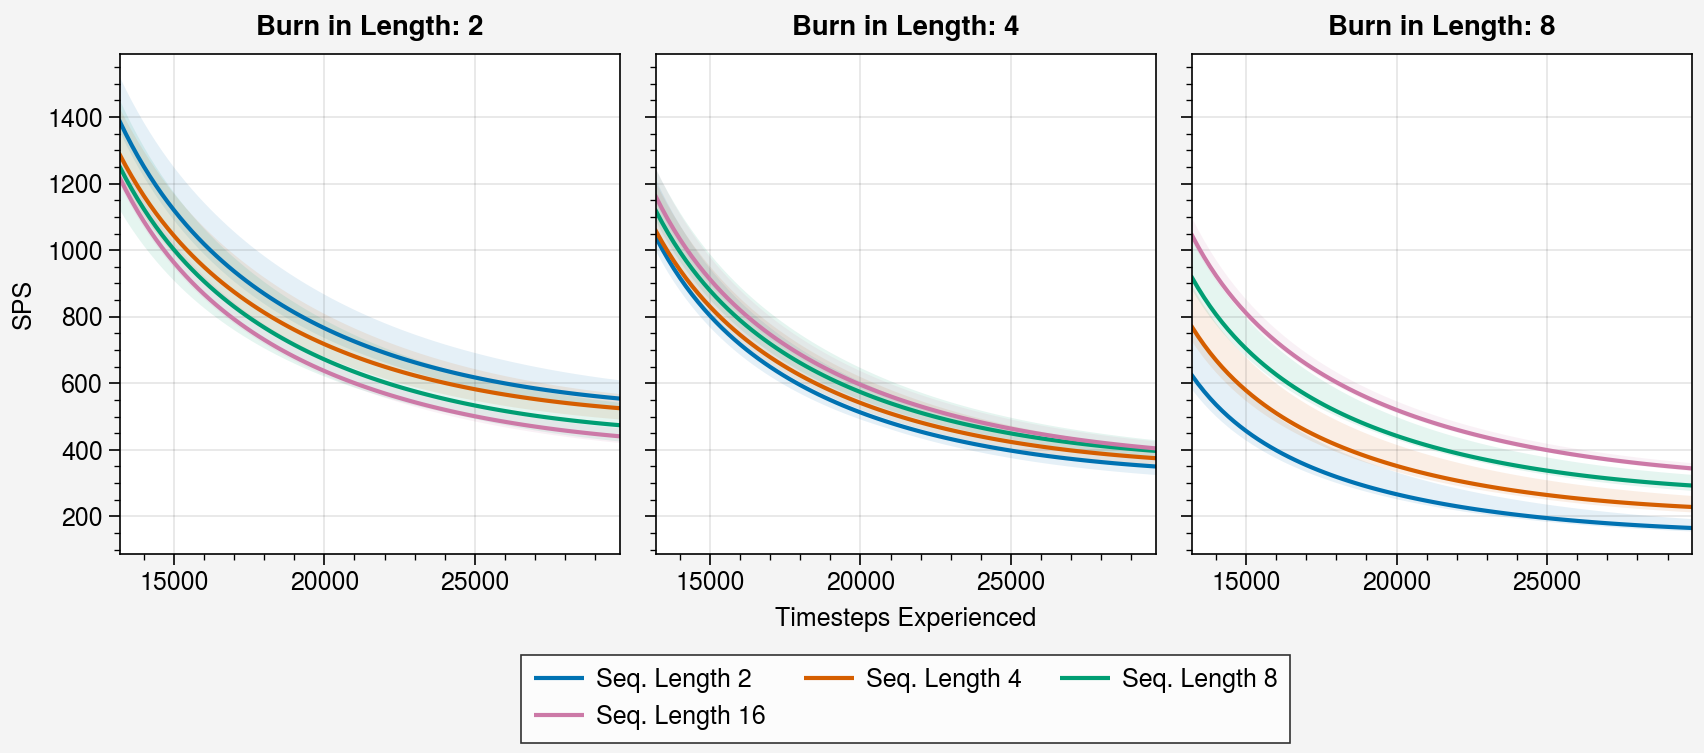

In [16]:
fig, ax = pplt.subplots(ncols=3)

sequence_lengths = [2, 4, 8, 16]
burn_in_lengths = [2, 4, 8]

for i, bil in enumerate(burn_in_lengths):
    lines = []
    for seq in sequence_lengths:
        exp_name = f'cartpole_seq{seq}bil{bil}'
        lines.append(average_runs(exp_name, metric='charts/SPS', ax=ax[i], label=f'Seq. Length {seq}'))
        
fig.legend(lines, loc='b')
ax.format(xlabel='Timesteps Experienced', ylabel='SPS',
         toplabels=[f'Burn in Length: {bil}' for bil in burn_in_lengths])
fig.savefig('cartpole_SPS.jpg')

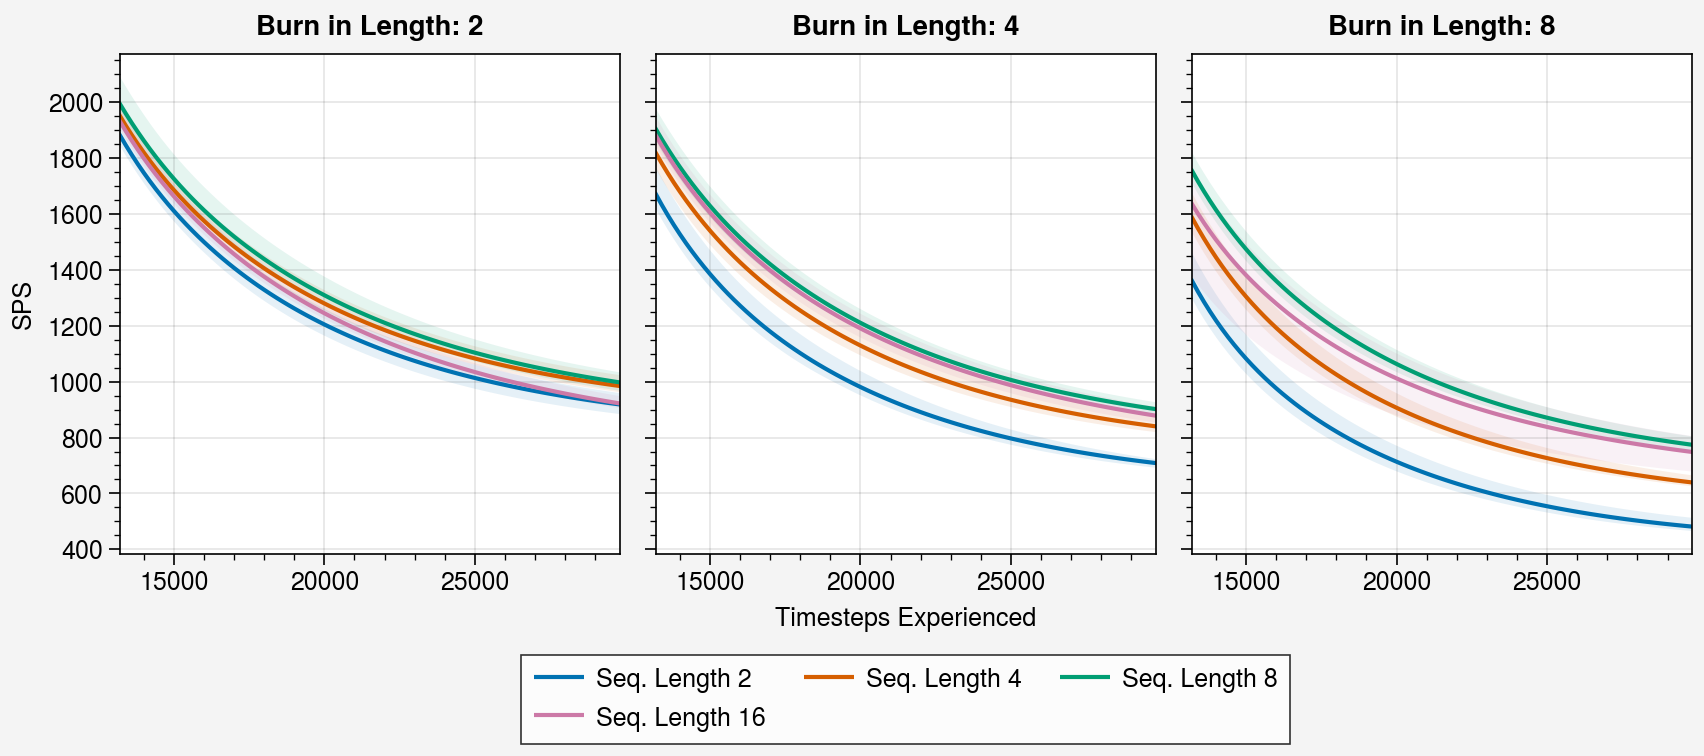

In [15]:
fig, ax = pplt.subplots(ncols=3)

sequence_lengths = [2, 4, 8, 16]
burn_in_lengths = [2, 4, 8]

for i, bil in enumerate(burn_in_lengths):
    lines = []
    for seq in sequence_lengths:
        exp_name = f'cartpole_seq{seq}bil{bil}'
        lines.append(average_runs(exp_name, metric='charts/SPS', ax=ax[i], label=f'Seq. Length {seq}'))
        
fig.legend(lines, loc='b')
ax.format(xlabel='Timesteps Experienced', ylabel='SPS',
         toplabels=[f'Burn in Length: {bil}' for bil in burn_in_lengths])
fig.savefig('cartpole_SPS.jpg')

In [7]:
print_runs(folder='../runs', exclude=0)

runs
├── cartpole
│   ├── EXP cartpole_seq16bil2: 10
│   ├── EXP cartpole_seq16bil4: 10
│   ├── EXP cartpole_seq16bil8: 10
│   ├── EXP cartpole_seq2bil2: 10
│   ├── EXP cartpole_seq2bil4: 10
│   ├── EXP cartpole_seq2bil8: 10
│   ├── EXP cartpole_seq4bil2: 10
│   ├── EXP cartpole_seq4bil4: 10
│   ├── EXP cartpole_seq4bil8: 10
│   ├── EXP cartpole_seq8bil2: 10
│   ├── EXP cartpole_seq8bil4: 10
│   ├── EXP cartpole_seq8bil8: 10
├── mwm_seqbil
│   ├── EXP mwm_seq16bil16: 3
│   ├── EXP mwm_seq16bil4: 3
│   ├── EXP mwm_seq16bil8: 3
│   ├── EXP mwm_seq2bil16: 3
│   ├── EXP mwm_seq2bil4: 3
│   ├── EXP mwm_seq2bil8: 3
│   ├── EXP mwm_seq32bil16: 3
│   ├── EXP mwm_seq32bil4: 3
│   ├── EXP mwm_seq32bil8: 3
│   ├── EXP mwm_seq4bil16: 3
│   ├── EXP mwm_seq4bil4: 3
│   ├── EXP mwm_seq4bil8: 3
│   ├── EXP mwm_seq8bil16: 3


# Testing R2D2 on navenv

## Sequence and Burn in lengths

Seems like sequence length can affect how quickly learning occurs. Longer sequence lengths mean fewer unique sequences and hence more redundancy per batch, therefore slowing down the amounnt learned per gradient update. Shorter sequence lengths appear able to converge to good policies anyhow.

Burn in length is maybe more important? A little hard to tell honestly but it seems like burn in length of 8 works well here, but maybe it doesn't really have an effect.

Running bil 0 and 2 to see if we can actually see different at the more extreme ends

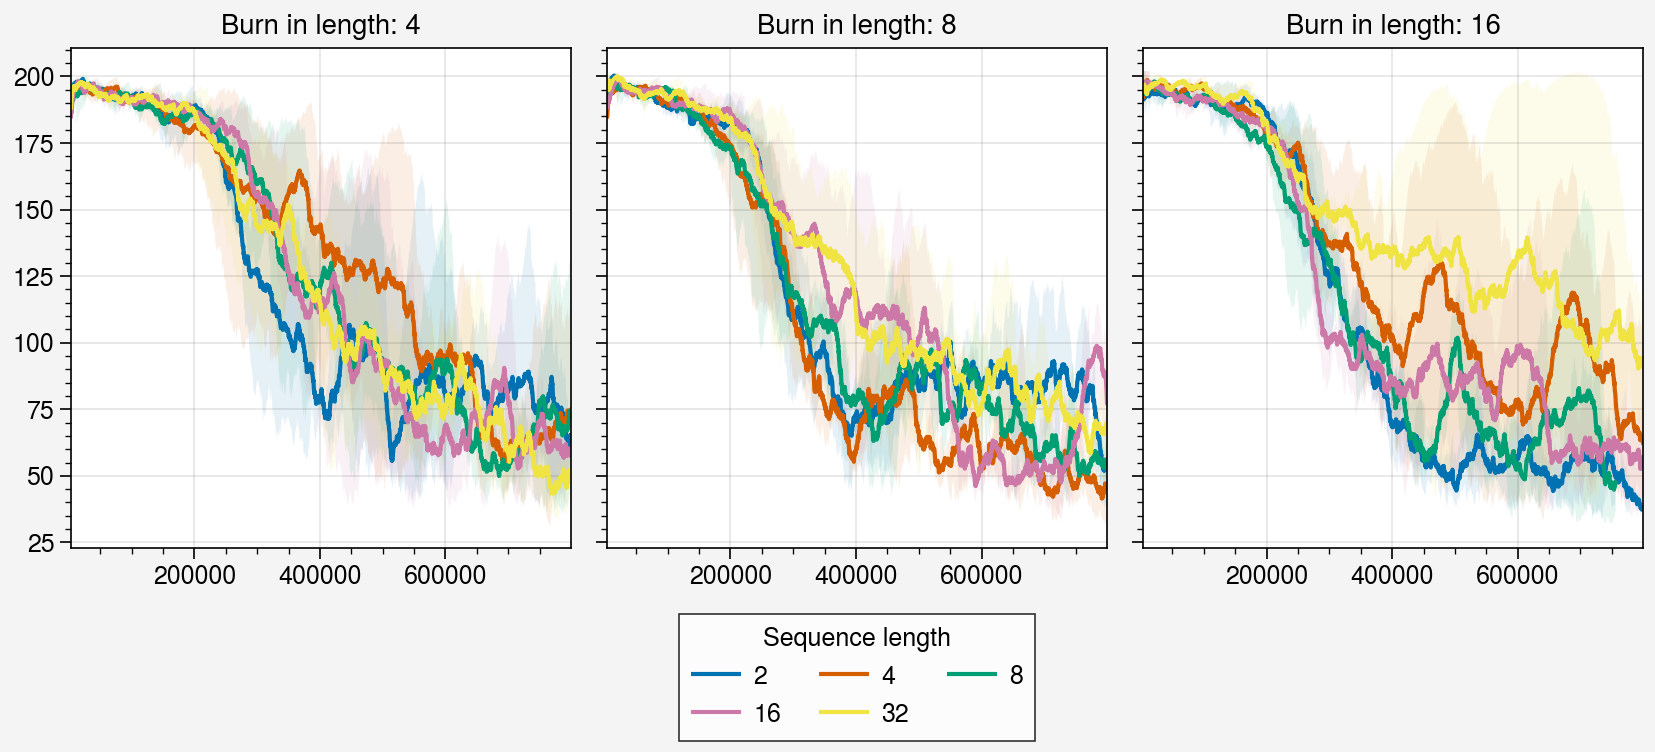

In [28]:
seqs = [2, 4, 8, 16, 32]
bils = [4, 8, 16]



fig, ax = pplt.subplots(ncols=3)

runs = print_runs(ret=True, prin=False)

for i, bil in enumerate(bils):
    lines = []
    for seq in seqs:
        exp_name = f'mwm_seqbil/mwm_seq{seq}bil{bil}'
        if exp_name.split('/')[1] in runs['mwm_seqbil']:
            line = average_runs(f'mwm_seqbil/mwm_seq{seq}bil{bil}', metric='length',
                         ax=ax[i], label=str(seq))
            lines.append(line)
            

fig.legend(lines, loc='b', title='Sequence length')
ax.format(title=[f'Burn in length: {bil}' for bil in bils])


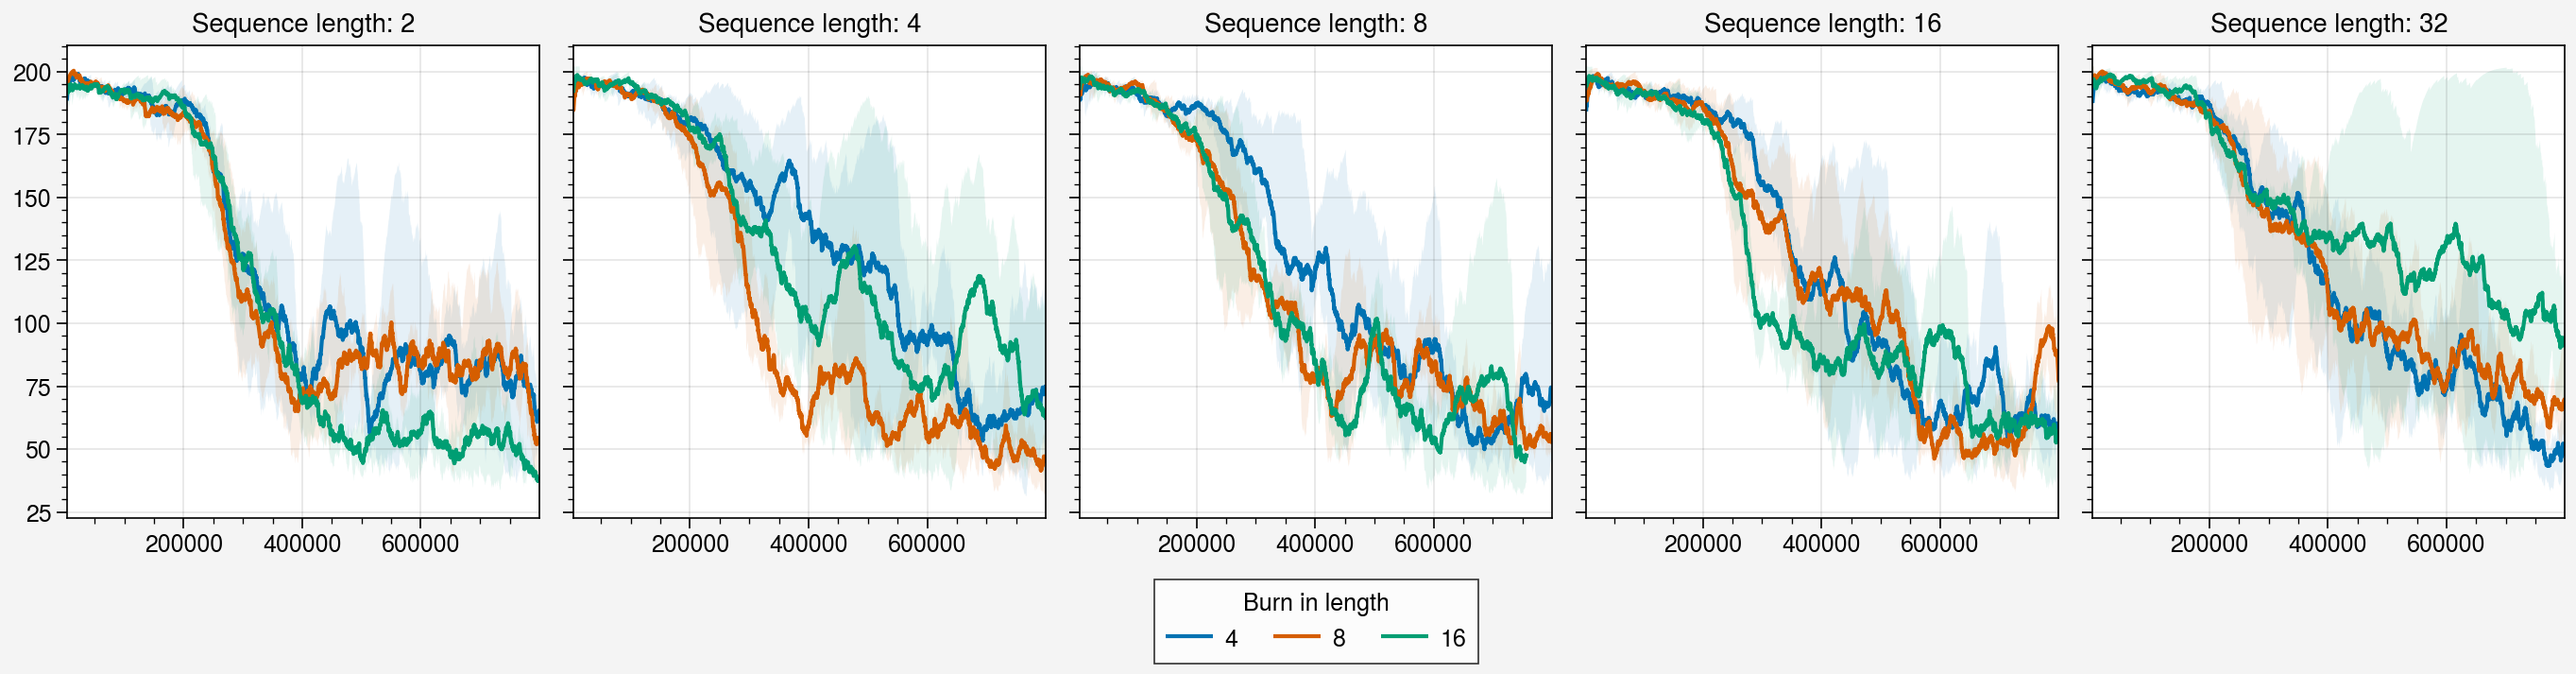

In [26]:
seqs = [2, 4, 8, 16, 32]
bils = [4, 8, 16]



fig, ax = pplt.subplots(ncols=5)

runs = print_runs(ret=True, prin=False)

for i, seq in enumerate(seqs):
    lines = []
    for bil in bils:
        exp_name = f'mwm_seqbil/mwm_seq{seq}bil{bil}'
        if exp_name.split('/')[1] in runs['mwm_seqbil']:
            line = average_runs(f'mwm_seqbil/mwm_seq{seq}bil{bil}', metric='length',
                         ax=ax[i], label=str(bil))
            lines.append(line)
            

fig.legend(lines, loc='b', title='Burn in length')
ax.format(title=[f'Sequence length: {seq}' for seq in seqs])


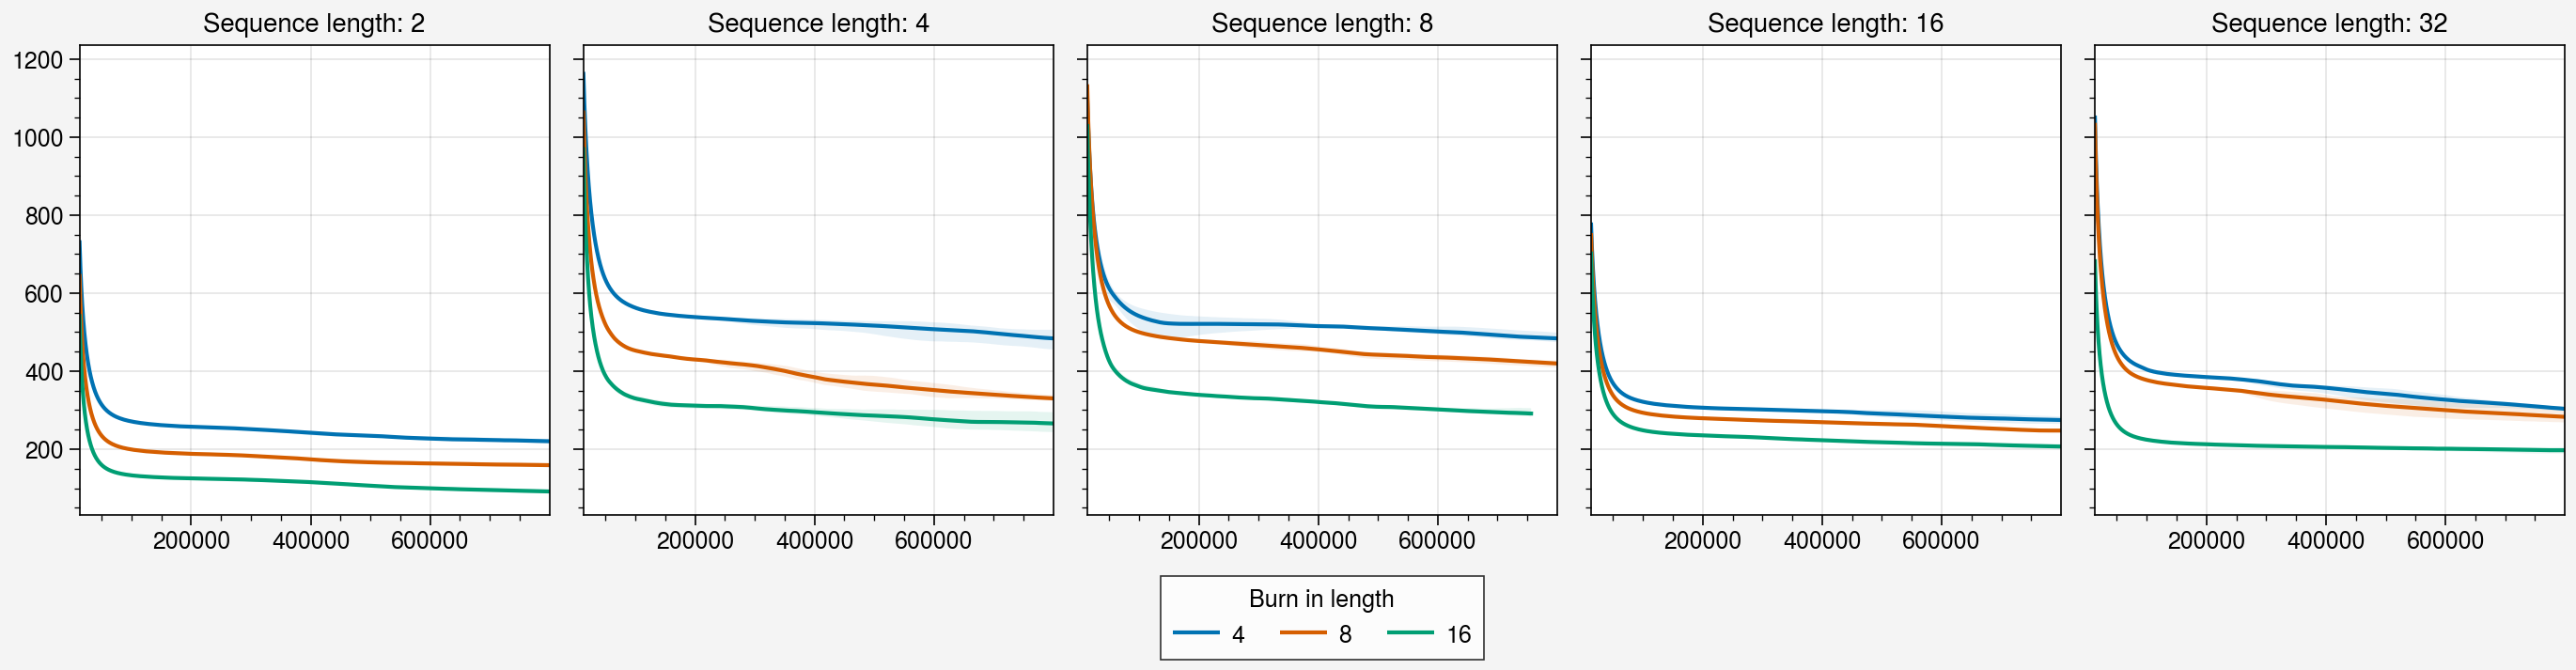

In [27]:
seqs = [2, 4, 8, 16, 32]
bils = [4, 8, 16]



fig, ax = pplt.subplots(ncols=5)

runs = print_runs(ret=True, prin=False)

for i, seq in enumerate(seqs):
    lines = []
    for bil in bils:
        exp_name = f'mwm_seqbil/mwm_seq{seq}bil{bil}'
        if exp_name.split('/')[1] in runs['mwm_seqbil']:
            line = average_runs(f'mwm_seqbil/mwm_seq{seq}bil{bil}', metric='charts/SPS',
                         ax=ax[i], label=str(bil))
            lines.append(line)
            

fig.legend(lines, loc='b', title='Burn in length')
ax.format(title=[f'Sequence length: {seq}' for seq in seqs])


## Batch size and Buffer size

As before, batch_size does indeed make a significant difference, although we get good learning with >256 batch size.

Buffer size also matters, with larger buffers seeming to stabilize leaarning a bit.

### Buffer

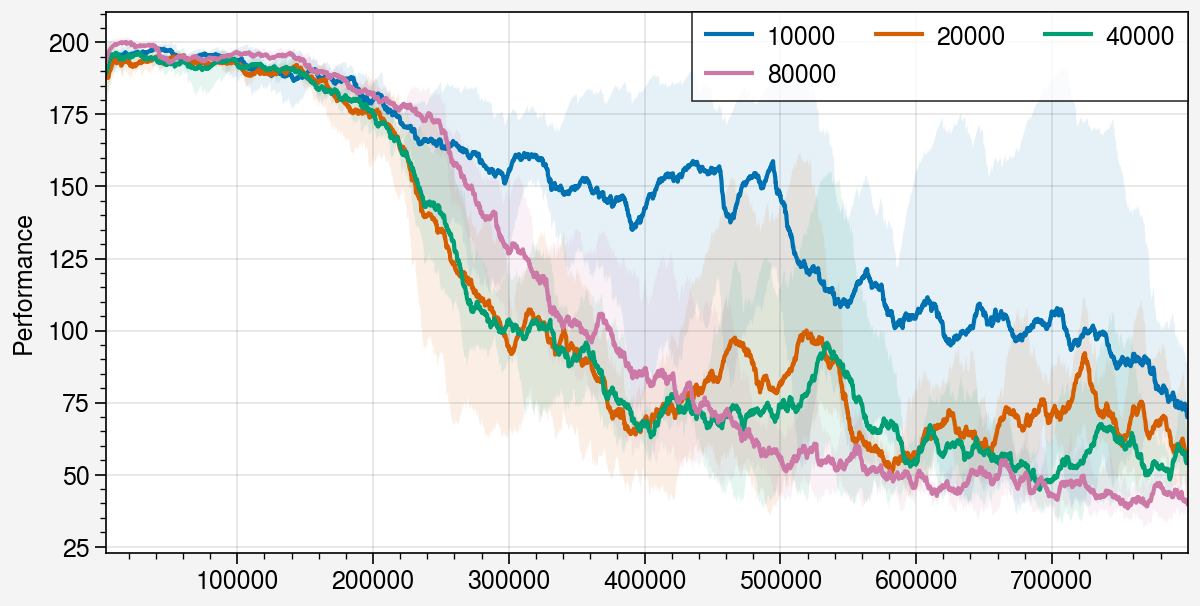

In [8]:
buffer_sizes = [10000, 20000, 40000, 80000]

fig, ax = pplt.subplots(refaspect=2, figwidth=6)

for i, buffer in enumerate(buffer_sizes):
    exp_name = f'mwm_batchbuffer/mwm_buffer{buffer}'
    average_runs(exp_name, 'length', ax=ax, label=f'{buffer}')
    
    
ax.legend()
ax.format(ylabel='Performance')

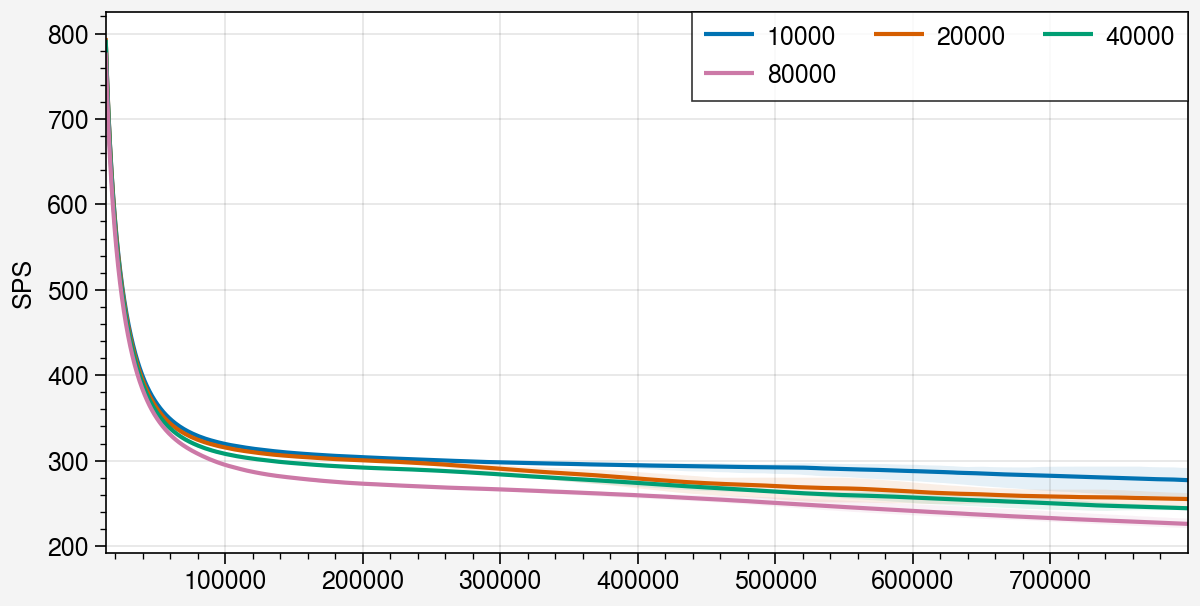

In [9]:
buffer_sizes = [10000, 20000, 40000, 80000]

fig, ax = pplt.subplots(refaspect=2, figwidth=6)

for i, buffer in enumerate(buffer_sizes):
    exp_name = f'mwm_batchbuffer/mwm_buffer{buffer}'
    average_runs(exp_name, 'charts/SPS', ax=ax, label=f'{buffer}')
    
    
ax.legend()
ax.format(ylabel='SPS')

### Batch

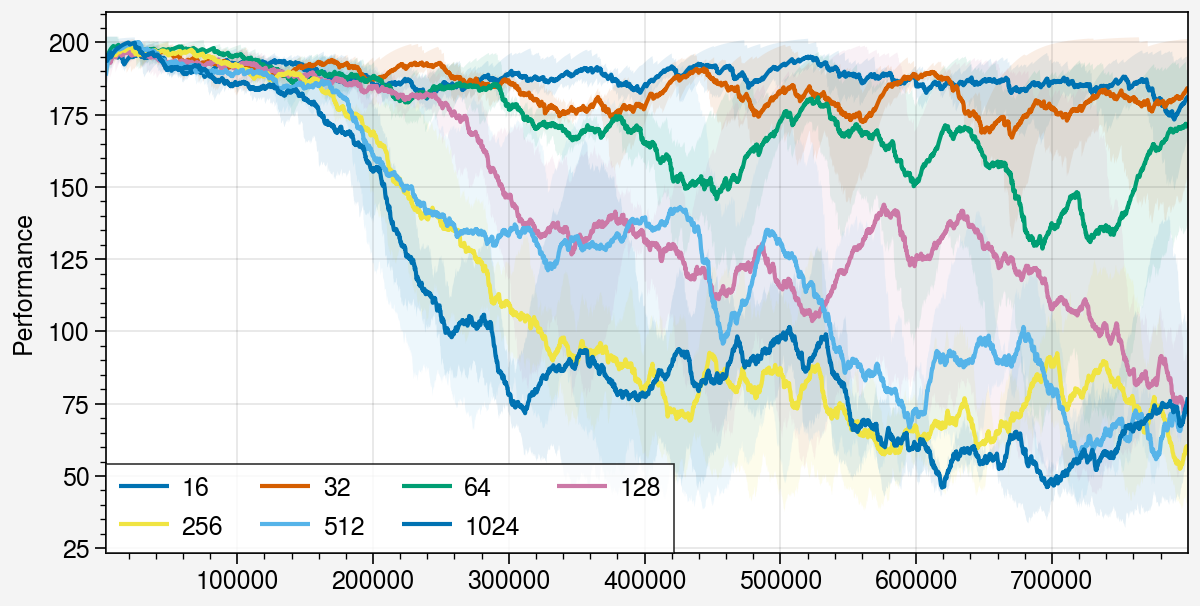

In [6]:
batch_sizes = [16, 32, 64, 128, 256, 512, 1024]

fig, ax = pplt.subplots(refaspect=2, figwidth=6)

for i, batch in enumerate(batch_sizes):
    exp_name = f'mwm_batchbuffer/mwm_batch{batch}'
    average_runs(exp_name, 'length', ax=ax, label=f'{batch}')
    
ax.legend(ncols=4)
ax.format(ylabel='Performance')

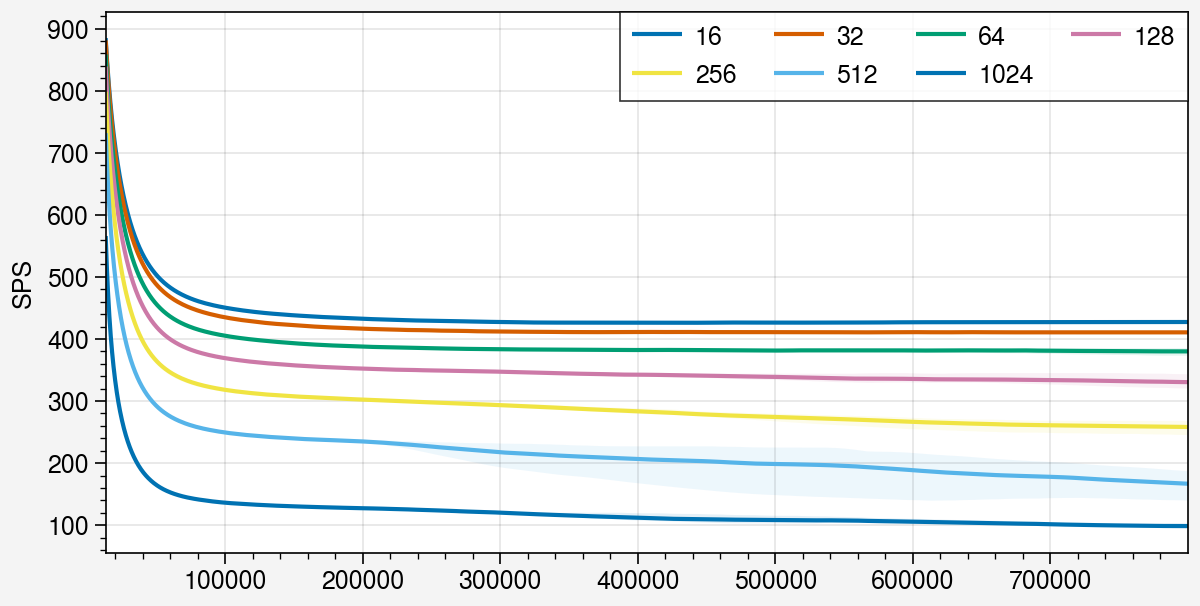

In [7]:
batch_sizes = [16, 32, 64, 128, 256, 512, 1024]

fig, ax = pplt.subplots(refaspect=2, figwidth=6)

for i, batch in enumerate(batch_sizes):
    exp_name = f'mwm_batchbuffer/mwm_batch{batch}'
    average_runs(exp_name, 'charts/SPS', ax=ax, label=f'{batch}')
    
ax.legend(ncols=4)
ax.format(ylabel='SPS')

In [18]:
df = load_exp_df('mwm_seqbil/mwm_seq16bil16', trial_num=1)

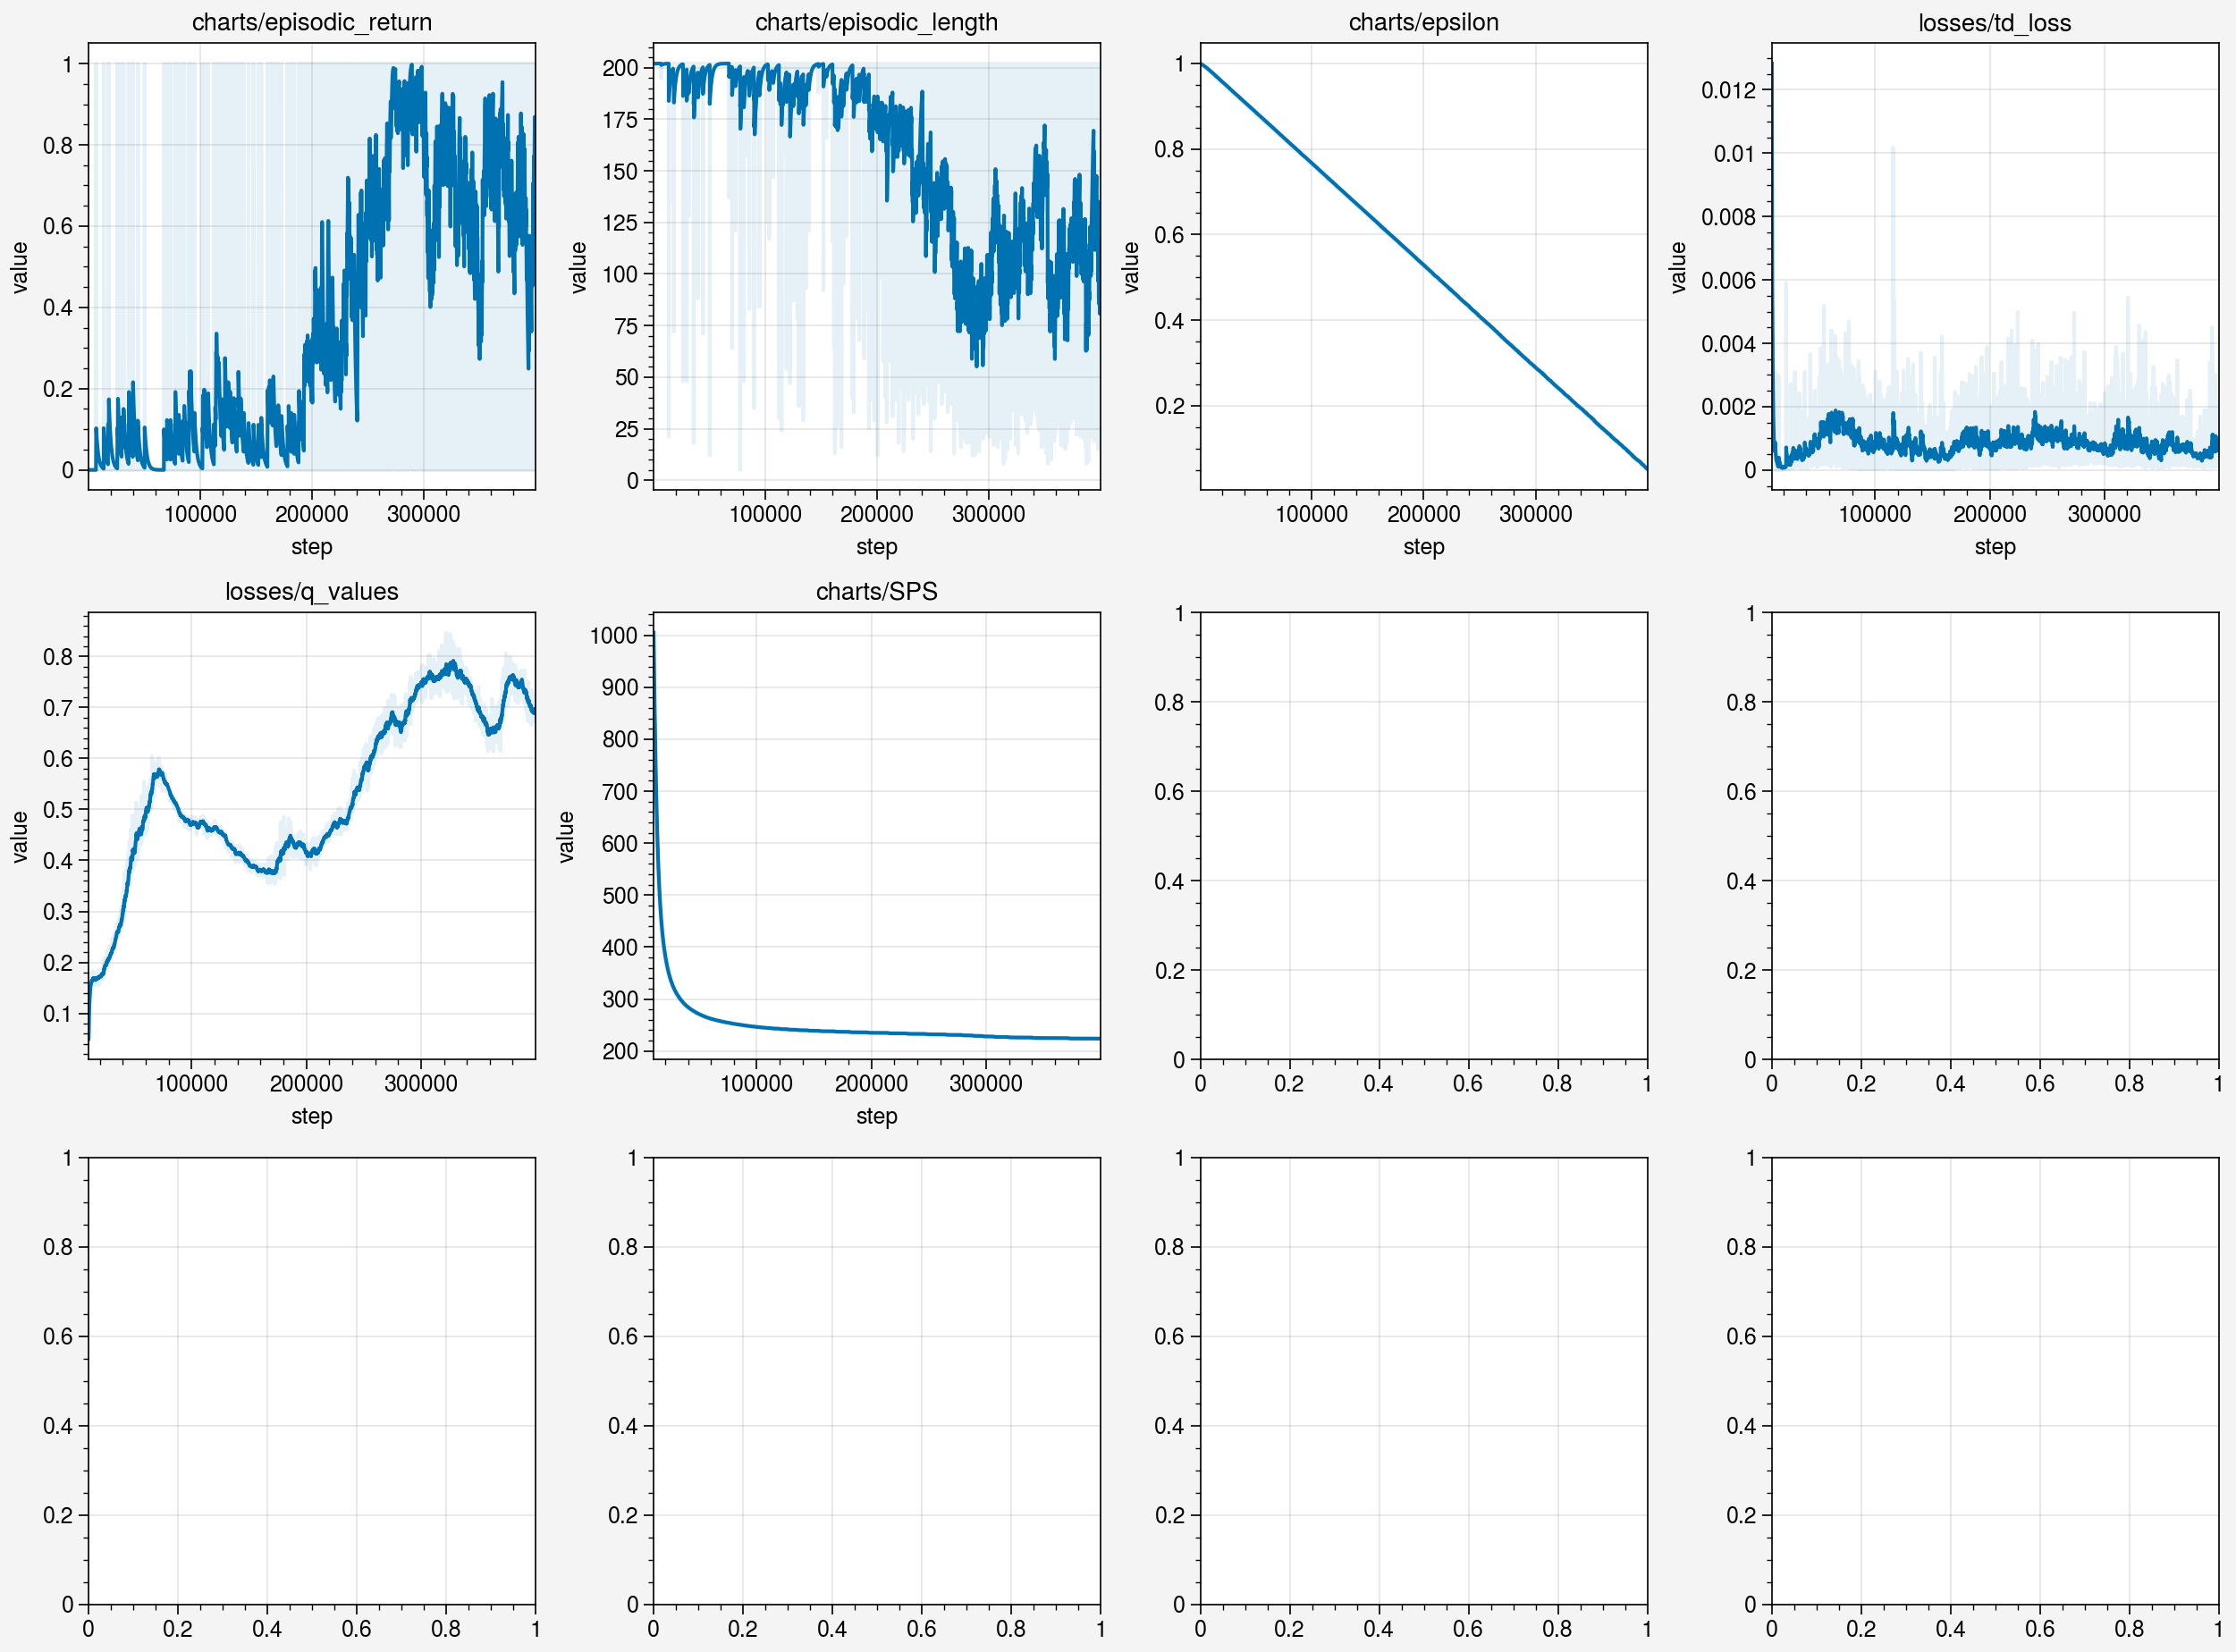

In [8]:
plot_exp_df(df)